<a href="https://colab.research.google.com/github/MuzafferEmreAkici/MuzafferEmreAkici/blob/main/Muzaffer_Emre_Ak%C4%B1c%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:


nobel = pd.read_csv("/content/asset-v1_Kodlasam+MS01+2023_06+type@asset+block@nobel.csv")

nobel["birth_date"] =pd.to_datetime(nobel["birth_date"], format="%Y-%m-%d")

nobel["death_date"] = pd.to_datetime(nobel["death_date"], format="%Y-%m-%d")

nobel["age"] = nobel["death_date"].dt.year - nobel["birth_date"].dt.year

nobel["age"].fillna(nobel["age"].mean(), inplace=True)

nobel["age"] = nobel["age"].astype(int)



nobel.head(5)






,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,59
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,68
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,63
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,82
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90


# Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.

In [ ]:
top_countries = nobel["birth_country"].value_counts().head(10)
print(top_countries)


United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


# Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [ ]:
import pandas as pd


women = nobel[nobel["sex"] == "Female"]


for award in nobel["category"].unique():
    first_woman = women[women["category"] == award].iloc[0]
    print(f"{award}: {first_woman['year']} - {first_woman['full_name']}")



Chemistry: 1911 - Marie Curie, née Sklodowska
Literature: 1909 - Selma Ottilia Lovisa Lagerlöf
Medicine: 1947 - Gerty Theresa Cori, née Radnitz
Peace: 1905 - Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau
Physics: 1903 - Marie Curie, née Sklodowska
Economics: 2009 - Elinor Ostrom


# Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [ ]:

men = nobel[nobel["sex"] == "Male"]


for award in nobel["category"].unique():
    first_men = men[men["category"] == award].iloc[0]
    print(f"{award}: {first_men['year']} - {first_men['full_name']}")


Chemistry: 1901 - Jacobus Henricus van 't Hoff
Literature: 1901 - Sully Prudhomme
Medicine: 1901 - Emil Adolf von Behring
Peace: 1901 - Jean Henry Dunant
Physics: 1901 - Wilhelm Conrad Röntgen
Economics: 1969 - Ragnar Frisch


# Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

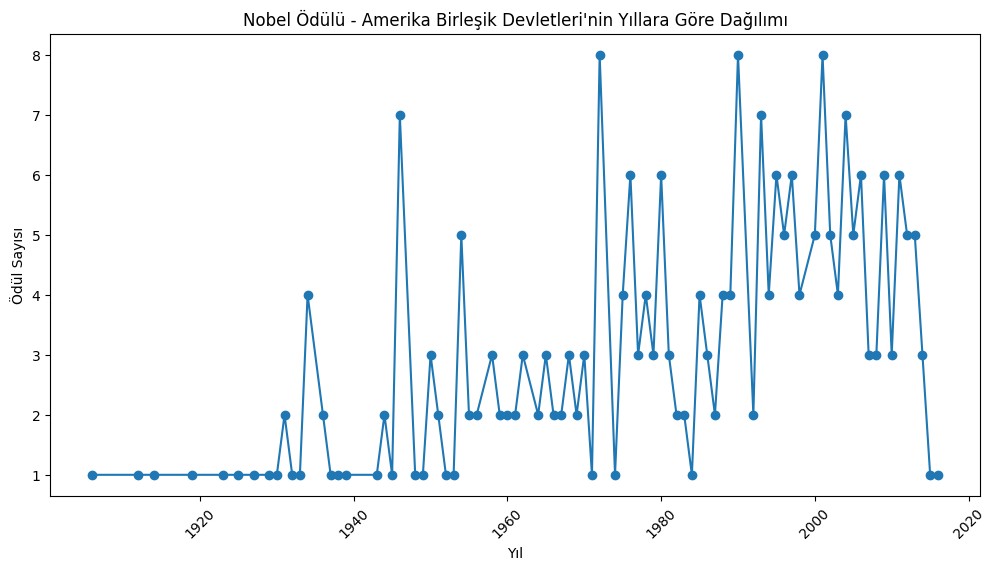

In [ ]:

us_data = nobel[nobel['birth_country'] == 'United States of America']
year_counts = us_data['year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Nobel Ödülü - Amerika Birleşik Devletleri\'nin Yıllara Göre Dağılımı')
plt.xticks(rotation=45)
plt.show()


# Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

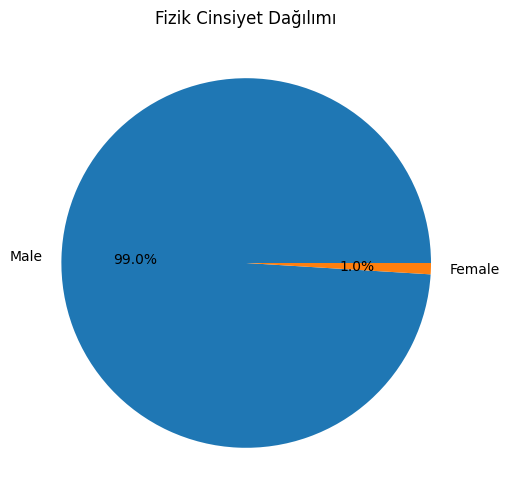

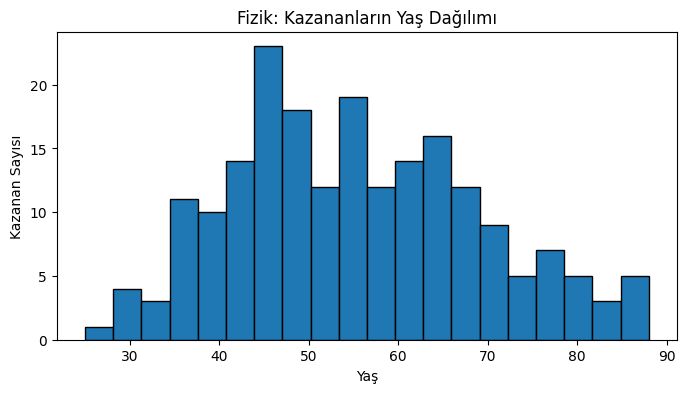

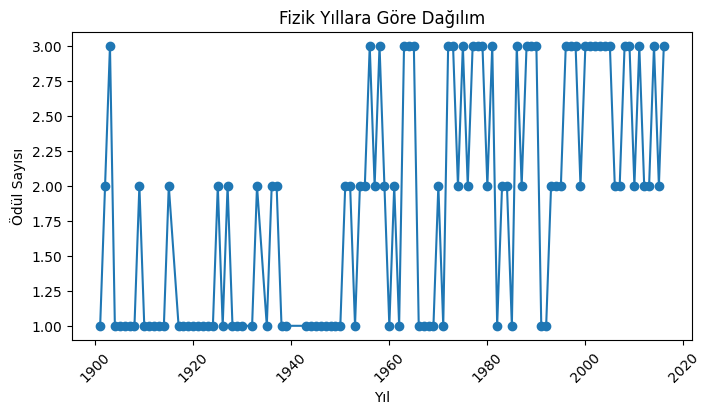

In [ ]:

physics_data = nobel[nobel['category'] == 'Physics'].copy()

physics_data['birth_date'] = pd.to_datetime(physics_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
physics_data['Age'] = physics_data['year'] - physics_data['birth_date']

gender_counts = physics_data['sex'].value_counts()


age_counts = physics_data['Age'].value_counts().sort_index()

year_counts = physics_data['year'].value_counts().sort_index()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Fizik Cinsiyet Dağılımı')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(physics_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.title('Fizik: Kazananların Yaş Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Fizik Yıllara Göre Dağılım')
plt.xticks(rotation=45)
plt.show()

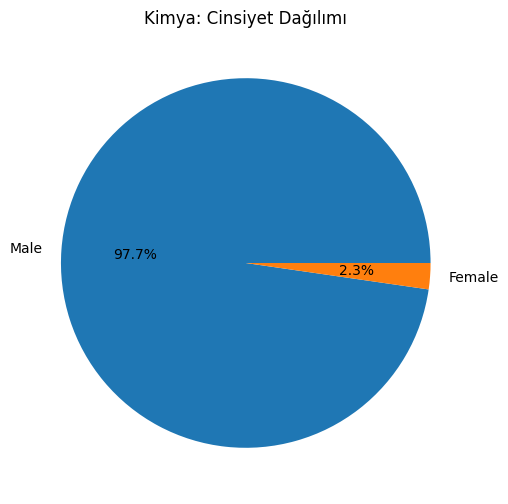

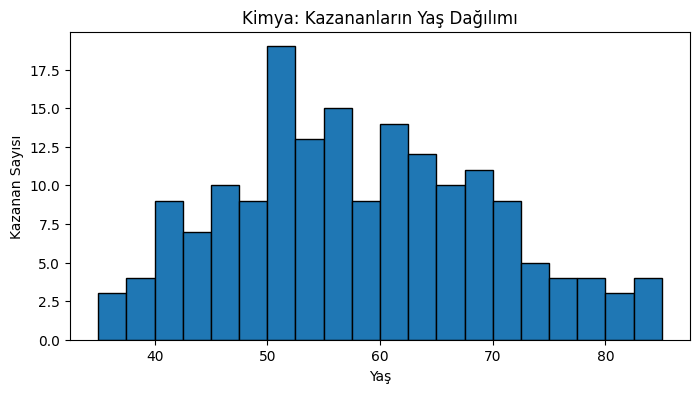

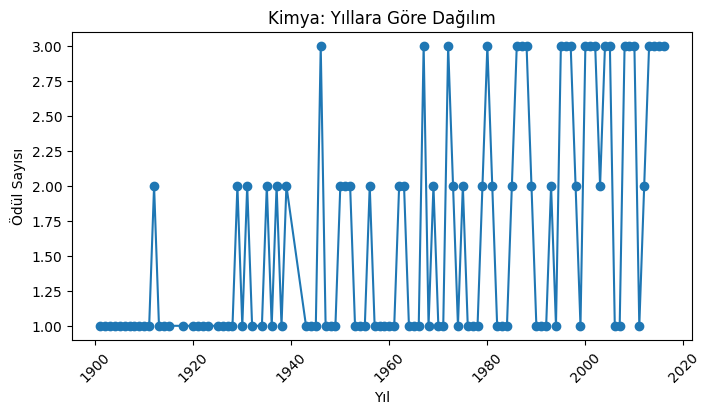

In [ ]:

chemistry_data = nobel[nobel['category'] == 'Chemistry'].copy()


chemistry_data['birth_date'] = pd.to_datetime(chemistry_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
chemistry_data['Age'] = chemistry_data['year'] - chemistry_data['birth_date']


gender_counts = chemistry_data['sex'].value_counts()


age_counts = chemistry_data['Age'].value_counts().sort_index()


year_counts = chemistry_data['year'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Kimya: Cinsiyet Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(chemistry_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.title('Kimya: Kazananların Yaş Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Kimya: Yıllara Göre Dağılım')
plt.xticks(rotation=45)
plt.show()

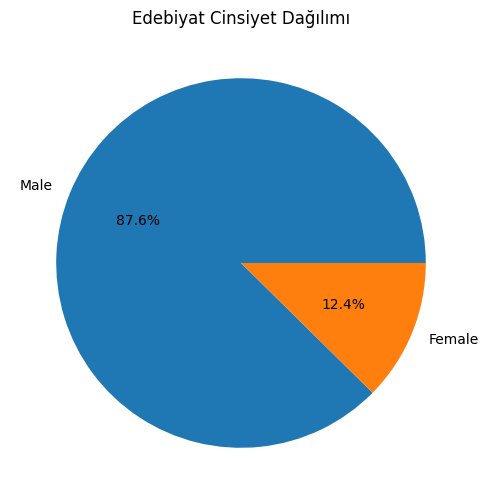

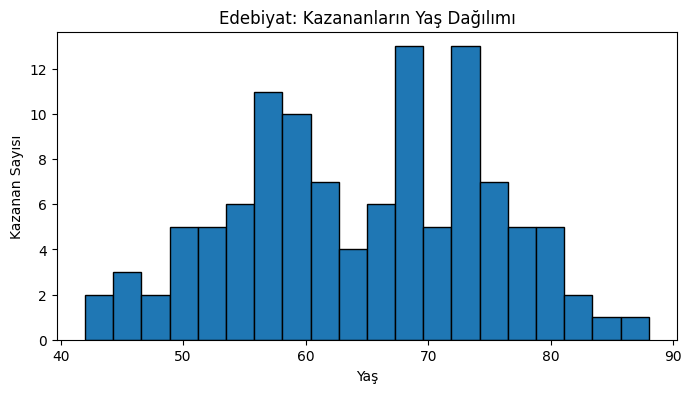

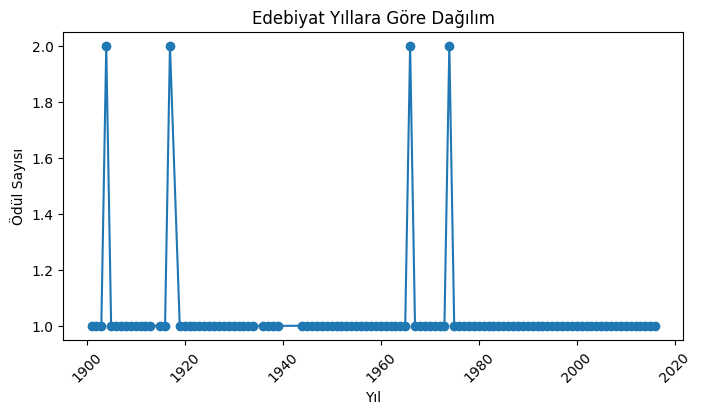

In [ ]:

literature_data = nobel[nobel['category'] == 'Literature'].copy()


literature_data['birth_date'] = pd.to_datetime(literature_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
literature_data['Age'] = literature_data['year'] - literature_data['birth_date']


gender_counts = literature_data['sex'].value_counts()


age_counts = literature_data['Age'].value_counts().sort_index()


year_counts = literature_data['year'].value_counts().sort_index()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Edebiyat Cinsiyet Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(literature_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.title('Edebiyat: Kazananların Yaş Dağılımı')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Edebiyat Yıllara Göre Dağılım')
plt.xticks(rotation=45)
plt.show()

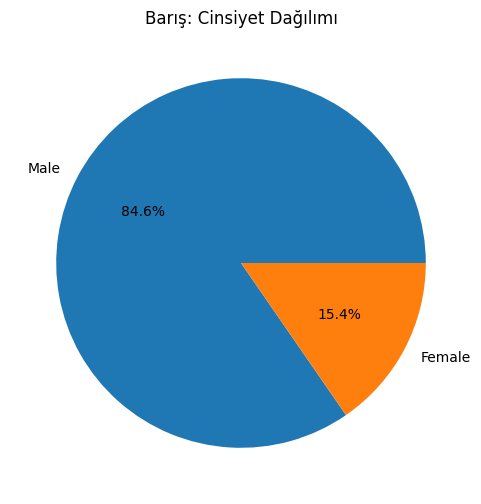

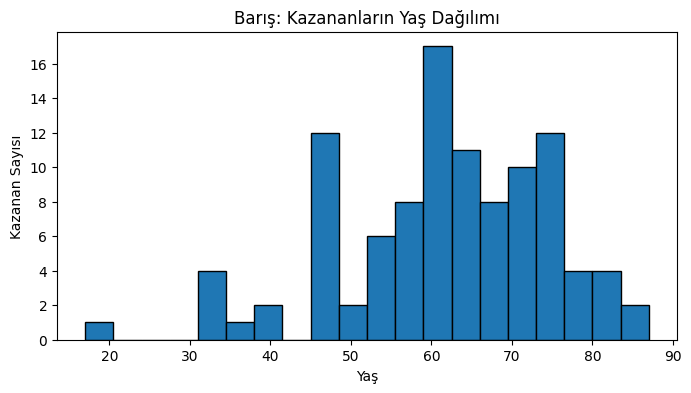

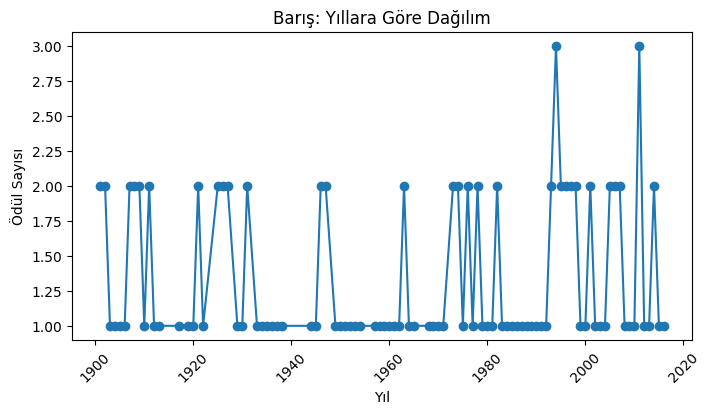

In [ ]:

peace_data = nobel[nobel['category'] == 'Peace'].copy()


peace_data['birth_date'] = pd.to_datetime(peace_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
peace_data['Age'] = peace_data['year'] - peace_data['birth_date']


gender_counts = peace_data['sex'].value_counts()


age_counts = peace_data['Age'].value_counts().sort_index()


year_counts = peace_data['year'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Barış: Cinsiyet Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(peace_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.title('Barış: Kazananların Yaş Dağılımı')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Barış: Yıllara Göre Dağılım')
plt.xticks(rotation=45)
plt.show()

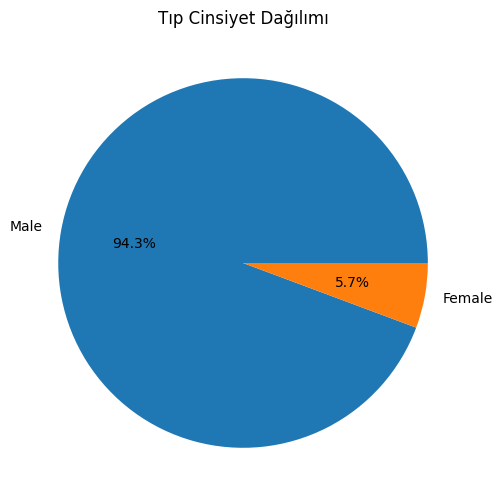

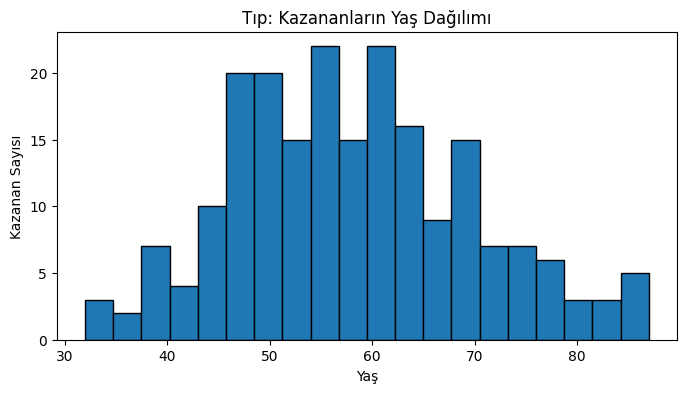

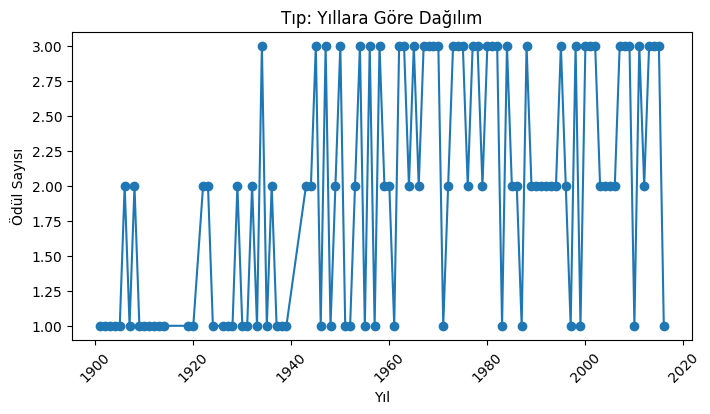

In [ ]:

medicine_data = nobel[nobel['category'] == 'Medicine'].copy()


medicine_data['birth_date'] = pd.to_datetime(medicine_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
medicine_data['Age'] = medicine_data['year'] - medicine_data['birth_date']


gender_counts = medicine_data['sex'].value_counts()

age_counts = medicine_data['Age'].value_counts().sort_index()


year_counts = medicine_data['year'].value_counts().sort_index()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Tıp Cinsiyet Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(medicine_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.title('Tıp: Kazananların Yaş Dağılımı')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Tıp: Yıllara Göre Dağılım')
plt.xticks(rotation=45)
plt.show()

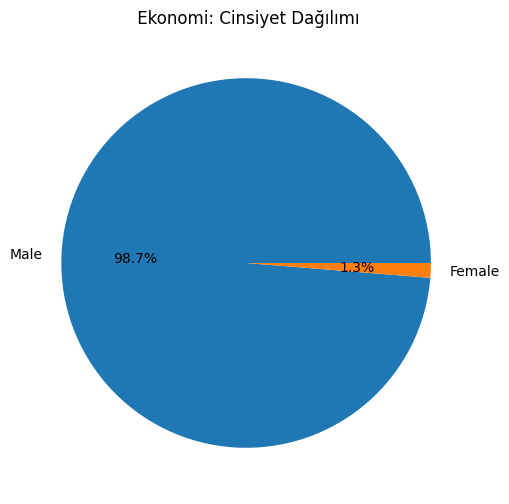

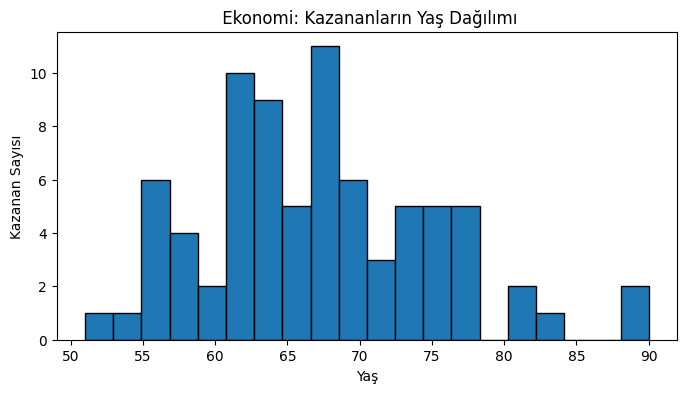

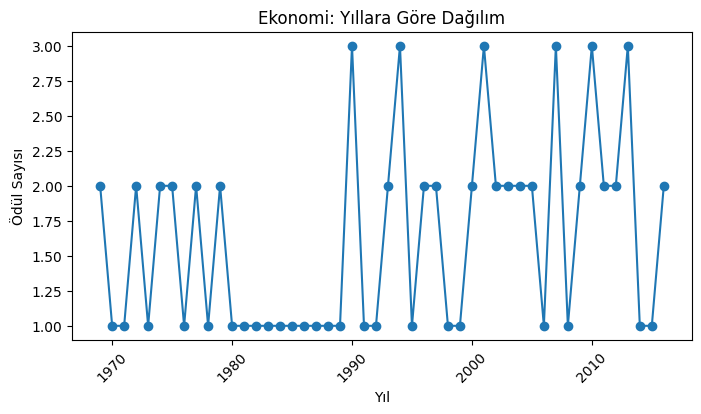

In [ ]:

economics_data = nobel[nobel['category'] == 'Economics'].copy()


economics_data['birth_date'] = pd.to_datetime(economics_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
economics_data['Age'] = economics_data['year'] - economics_data['birth_date']


gender_counts = economics_data['sex'].value_counts()

age_counts = economics_data['Age'].value_counts().sort_index()


year_counts = economics_data['year'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title(' Ekonomi: Cinsiyet Dağılımı')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(economics_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.title(' Ekonomi: Kazananların Yaş Dağılımı')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.title('Ekonomi: Yıllara Göre Dağılım')
plt.xticks(rotation=45)
plt.show()

# 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız

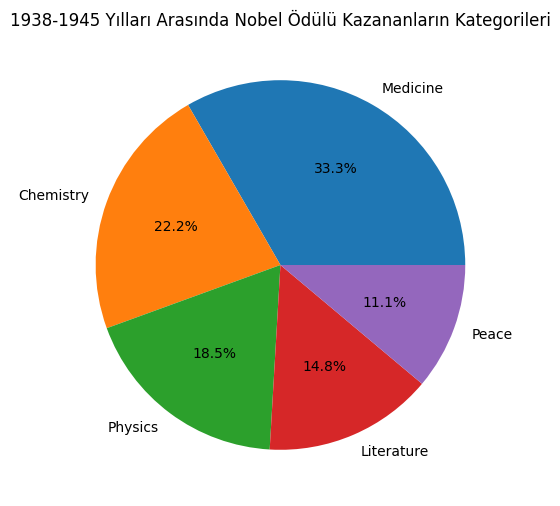

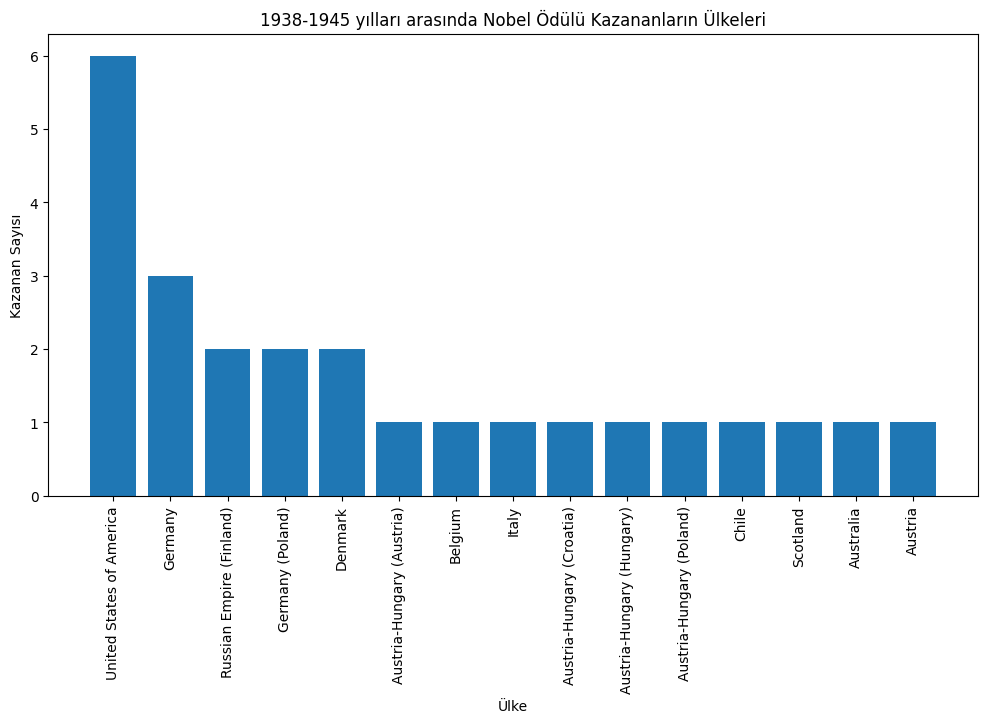

In [ ]:


filtered_nobel = nobel[(nobel['year'] >= 1938) & (nobel['year'] <= 1945)]


plt.figure(figsize=(12, 6))
filtered_nobel['category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazananların Kategorileri')
plt.ylabel('')
plt.show()


country_counts = filtered_nobel['birth_country'].value_counts()


plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Ülke')
plt.ylabel('Kazanan Sayısı')
plt.title('1938-1945 yılları arasında Nobel Ödülü Kazananların Ülkeleri')
plt.xticks(rotation=90)
plt.show()


# 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)

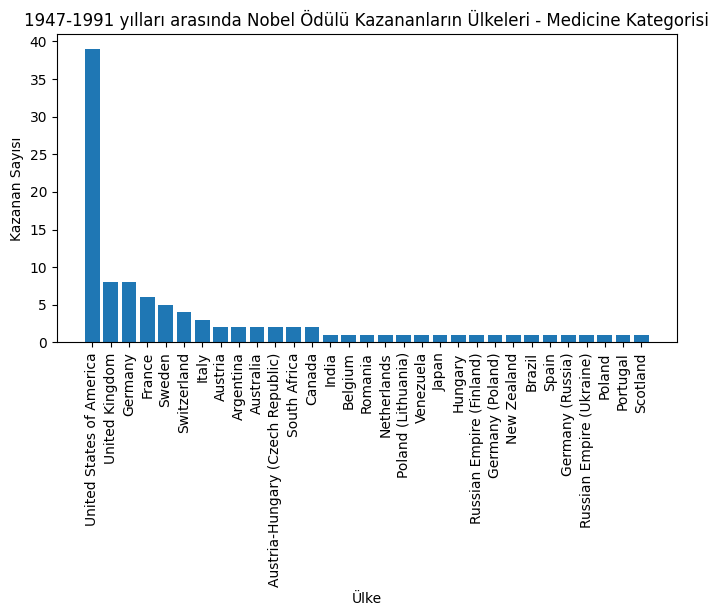

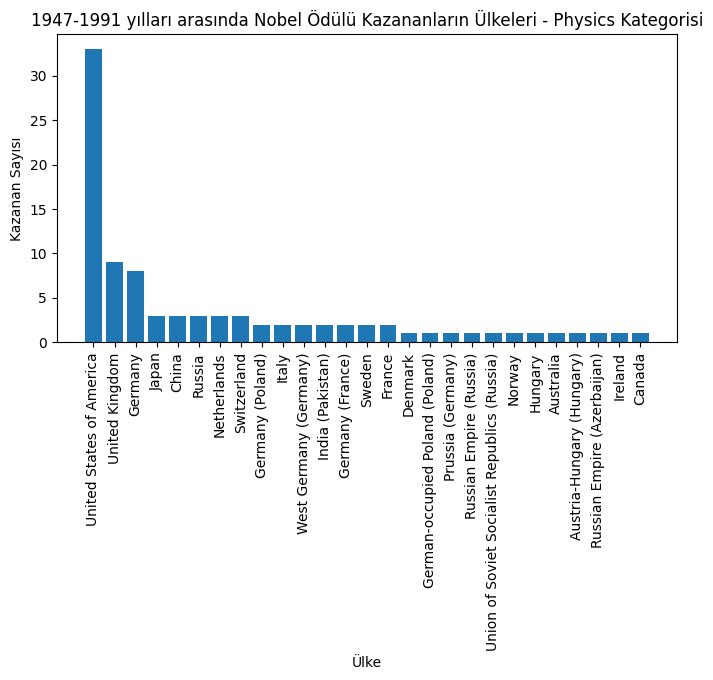

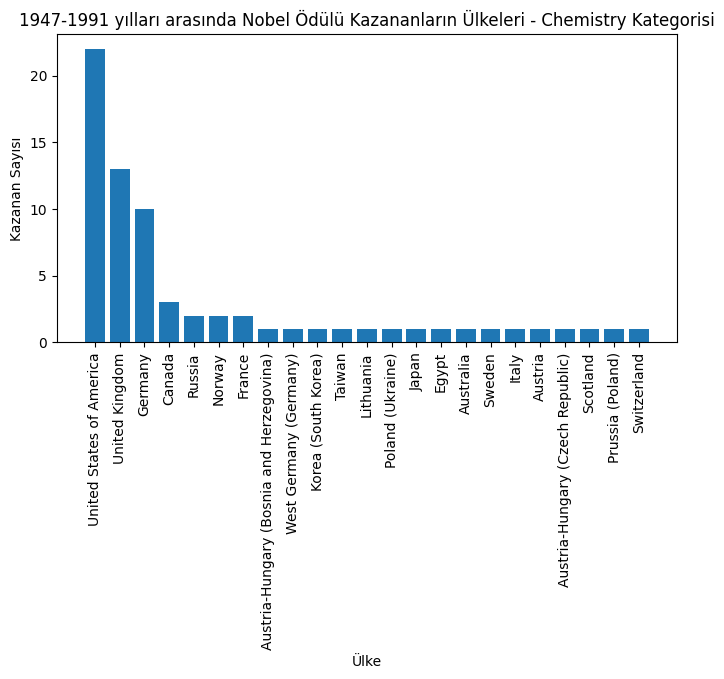

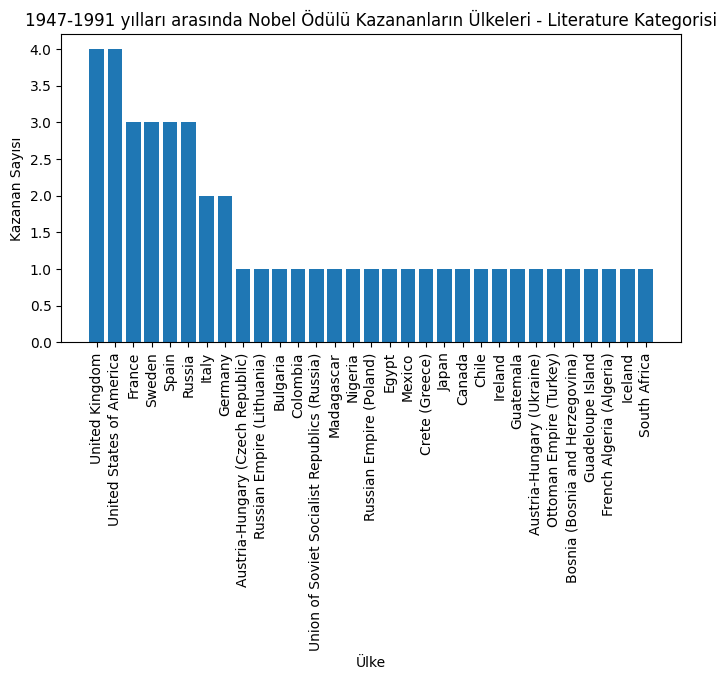

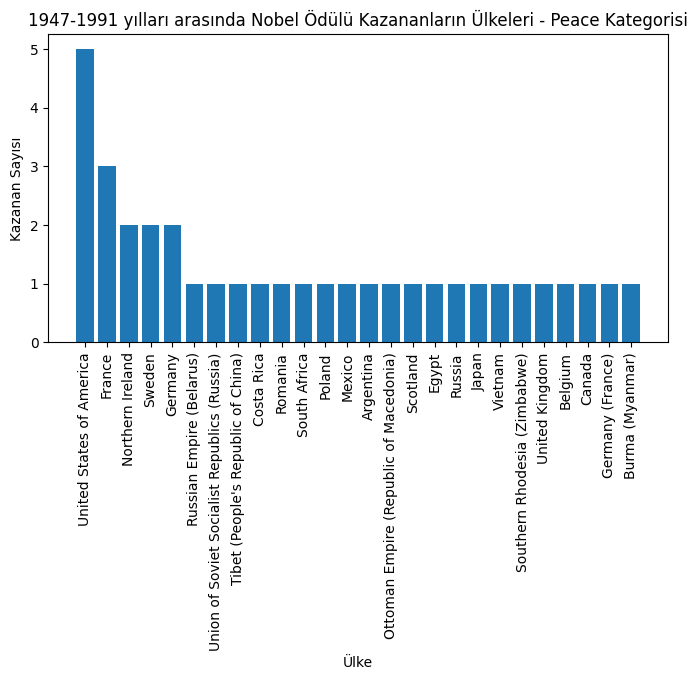

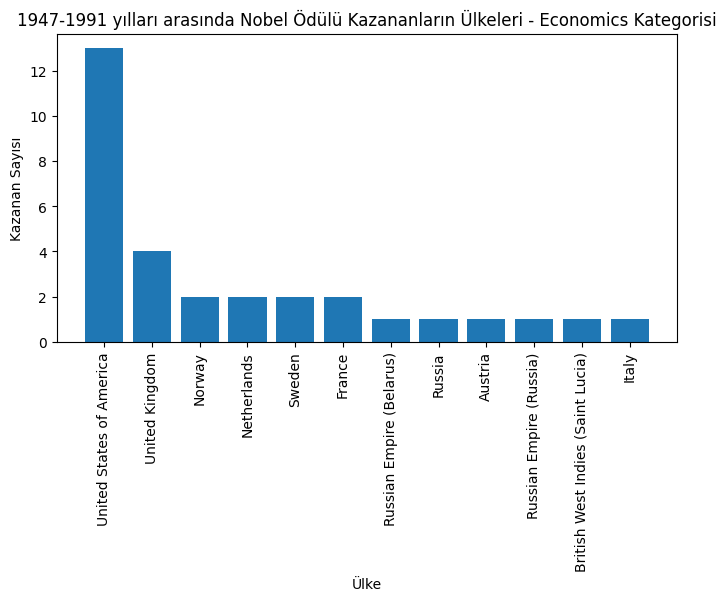

In [ ]:

category_counts = nobel[(nobel['year'] >= 1947) & (nobel['year'] <= 1991)]['category'].value_counts()


for category in category_counts.index:
    category_data = nobel[(nobel['year'] >= 1947) & (nobel['year'] <= 1991) & (nobel['category'] == category)]
    country_counts = category_data['birth_country'].value_counts()

    plt.figure(figsize=(8, 4))
    plt.bar(country_counts.index, country_counts.values)
    plt.xlabel('Ülke')
    plt.ylabel('Kazanan Sayısı')
    plt.title(f'1947-1991 yılları arasında Nobel Ödülü Kazananların Ülkeleri - {category} Kategorisi')
    plt.xticks(rotation=90)
    plt.show()

# Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.


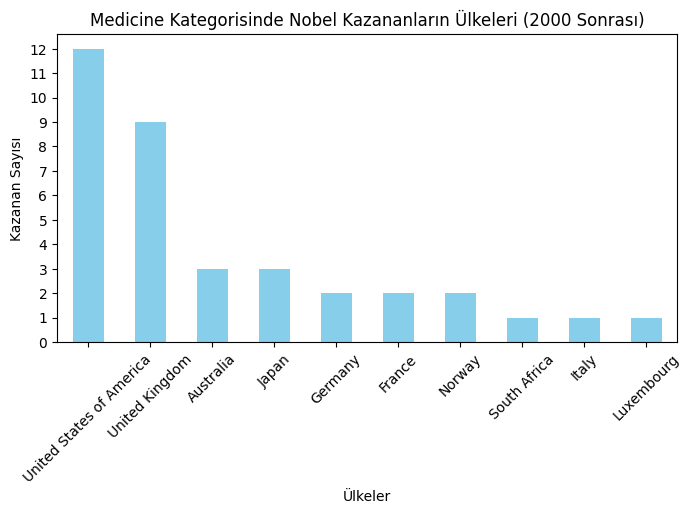

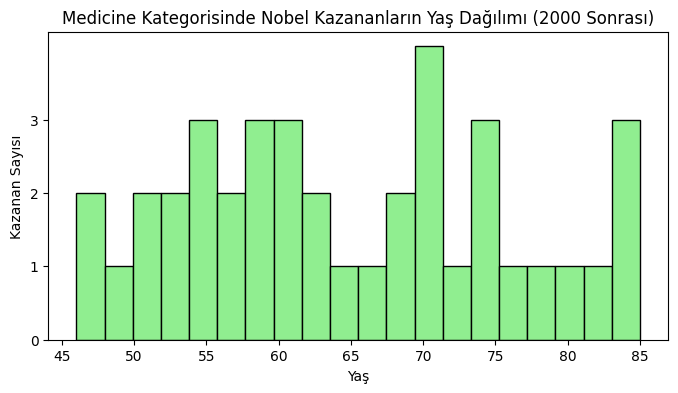

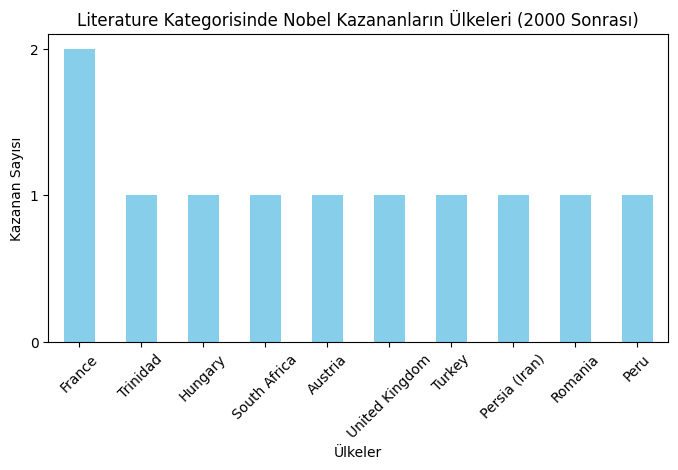

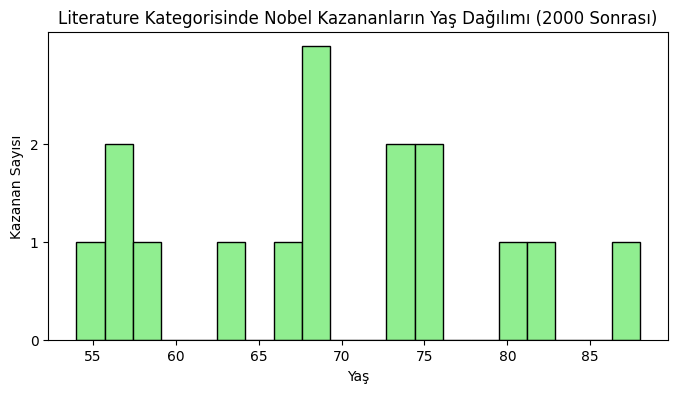

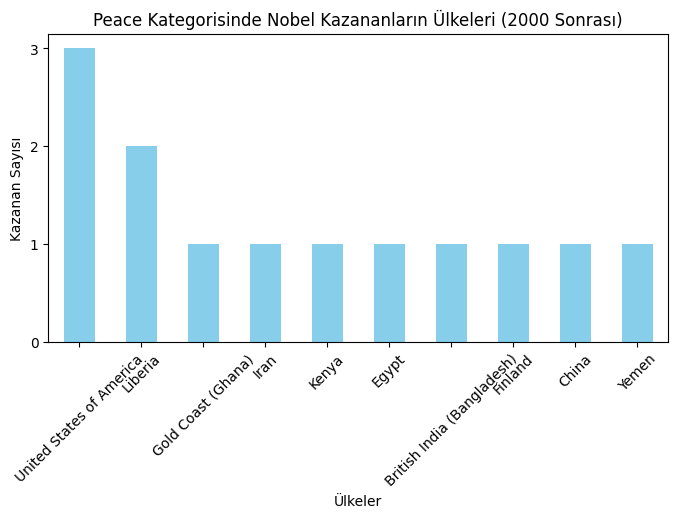

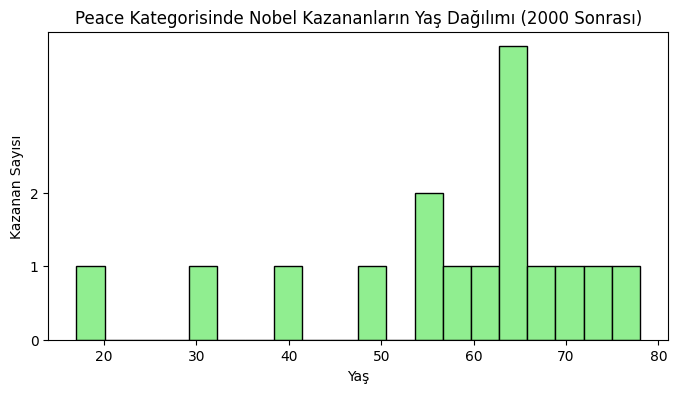

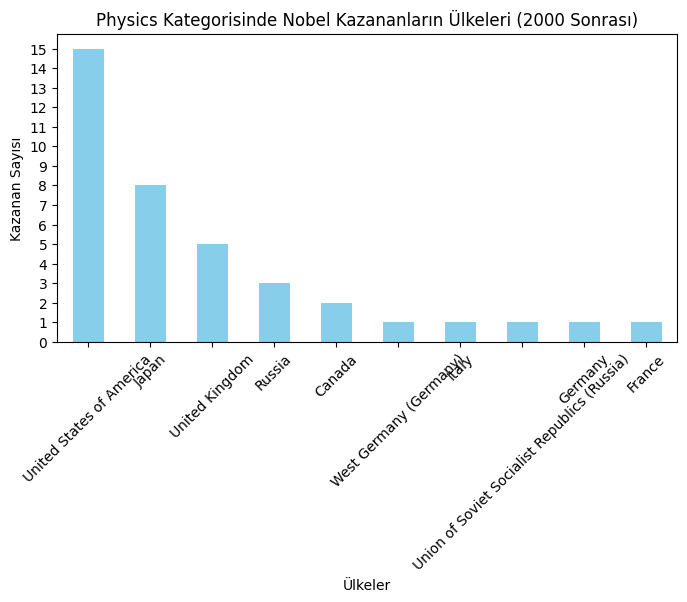

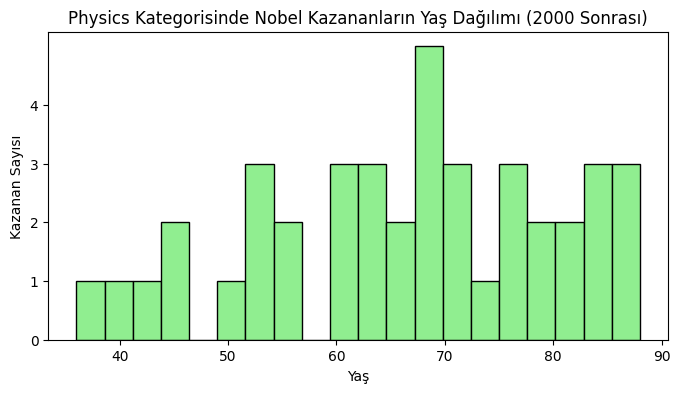

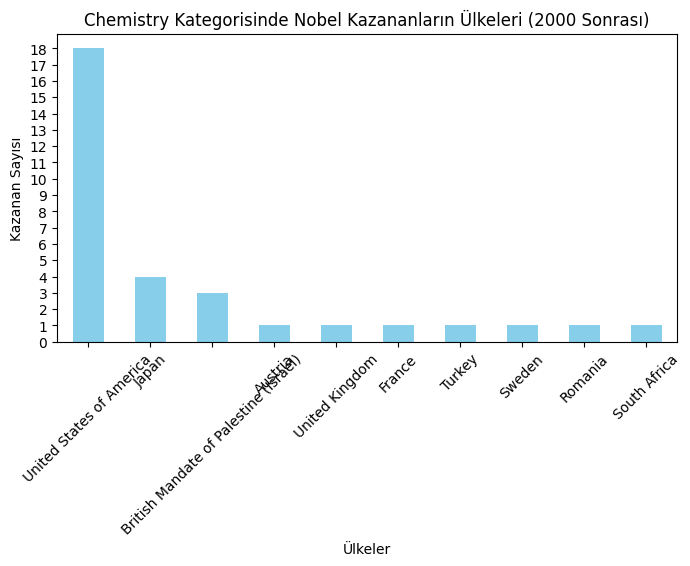

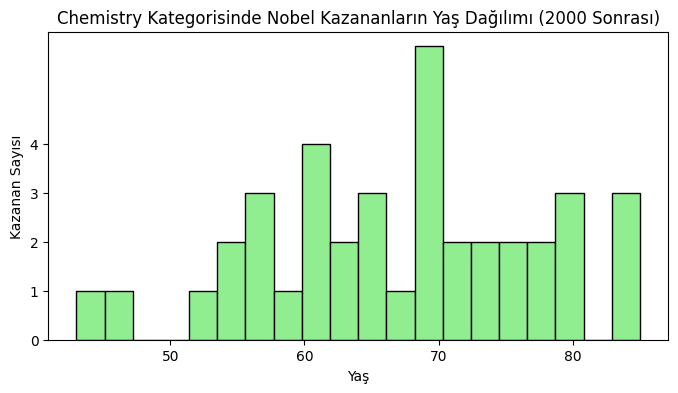

In [ ]:


selected_categories = ['Medicine', 'Literature', 'Peace', 'Physics', 'Chemistry']
selected_data = nobel[(nobel['category'].isin(selected_categories)) & (nobel['year'] > 2000)].copy()


selected_data['birth_date'] = pd.to_datetime(selected_data['birth_date'], format='%Y-%m-%d', errors='coerce').dt.year
selected_data['Age'] = selected_data['year'] - selected_data['birth_date']

for category in selected_categories:
    category_data = selected_data[selected_data['category'] == category]


    plt.figure(figsize=(8, 4))
    country_counts = category_data['birth_country'].value_counts().head(10).astype(int)
    country_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Ülkeler')
    plt.ylabel('Kazanan Sayısı')
    plt.title(f'{category} Kategorisinde Nobel Kazananların Ülkeleri (2000 Sonrası)')
    plt.xticks(rotation=45)
    plt.yticks(range(country_counts.max() + 1))
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.hist(category_data['Age'], bins=20, edgecolor='black', color='lightgreen')
    plt.xlabel('Yaş')
    plt.ylabel('Kazanan Sayısı')
    plt.title(f'{category} Kategorisinde Nobel Kazananların Yaş Dağılımı (2000 Sonrası)')
    plt.yticks(range(category_data['Age'].value_counts().max() + 1))
